In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# importing the data in features
X = df[['age', 'fare']]
X.age.fillna(value =X['age'].mean(), inplace=True)
# scalinf the data
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)
# perform clustering
model = KMeans(n_clusters=5)
model.fit(scaled_x)

df['clusters' ]= model .labels_

C:\Users\khawar\AppData\Local\Temp\ipykernel_4532\1998608801.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.age.fillna(value =X['age'].mean(), inplace=True)
c:\Users\khawar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,clusters
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [4]:
df['clusters'].unique()

array([3, 1, 4, 0, 2])

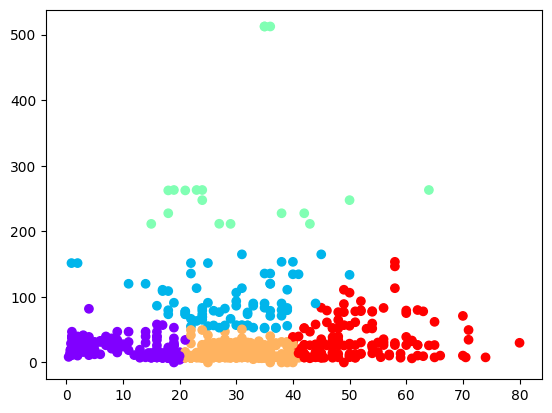

In [5]:
plt.scatter(df['age'], df['fare'], c=df['clusters'], cmap='rainbow')

In [6]:
import  plotly.express as px
fig = px.scatter(df , x='age', y='fare', color='clusters')
fig.show()

In [ ]:
fig = px.scatter_3d(df , x='age', y='fare',z='pclass', color='clusters')
fig.show()

In [ ]:
fig = px.parallel_coordinates(df, color ='clusters')
fig.show()